# Sparkify Project Workspace
This workspace contains a tiny subset (128MB) of the full dataset available (12GB). Feel free to use this workspace to build your project, or to explore a smaller subset with Spark before deploying your cluster on the cloud. Instructions for setting up your Spark cluster is included in the last lesson of the Extracurricular Spark Course content.

You can follow the steps below to guide your data analysis and model building portion of this project.

In [4]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as sf
import pyspark.sql.types as st
from pyspark.sql import Window

import datetime

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler, MinMaxScaler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1599486729918_0003,pyspark,idle,Link,Link,✔


In [12]:
spark = SparkSession.builder \
    .appName("Sparkify Project Small") \
    .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
sc.install_pypi_package("seaborn")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("pandas")
sc.install_pypi_package("scikit-learn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package already installed for current Spark context!
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/context.py", line 1110, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



In [14]:
spark.sparkContext.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.0    
boto                       2.49.0   
certifi                    2020.6.20
cycler                     0.10.0   
jmespath                   0.9.5    
joblib                     0.16.0   
kiwisolver                 1.2.0    
lxml                       4.5.0    
matplotlib                 3.3.1    
mysqlclient                1.4.2    
nltk                       3.4.5    
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.1.1    
Pillow                     7.2.0    
pip                        9.0.1    
py-dateutil                2.2      
pyparsing                  2.4.7    
python-dateutil            2.8.1    
python37-sagemaker-pyspark 1.3.0    
pytz                       2019.3   
PyYAML                     5.3.1    
scikit-learn               0.23.2   
scipy                      1.5.2    
seaborn                    0.10.1   
s

In [15]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load and Clean Dataset
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [16]:
data_filepath = 's3n://udacity-dsnd/sparkify/mini_sparkify_event_data.json'

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df = spark.read.json(data_filepath)
df.persist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[artist: string, auth: string, firstName: string, gender: string, itemInSession: bigint, lastName: string, length: double, level: string, location: string, method: string, page: string, registration: bigint, sessionId: bigint, song: string, status: bigint, ts: bigint, userAgent: string, userId: string]

In [18]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)

In [19]:
df.head(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(artist='Martha Tilston', auth='Logged In', firstName='Colin', gender='M', itemInSession=50, lastName='Freeman', length=277.89016, level='paid', location='Bakersfield, CA', method='PUT', page='NextSong', registration=1538173362000, sessionId=29, song='Rockpools', status=200, ts=1538352117000, userAgent='Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', userId='30'), Row(artist='Five Iron Frenzy', auth='Logged In', firstName='Micah', gender='M', itemInSession=79, lastName='Long', length=236.09424, level='free', location='Boston-Cambridge-Newton, MA-NH', method='PUT', page='NextSong', registration=1538331630000, sessionId=8, song='Canada', status=200, ts=1538352180000, userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36"', userId='9'), Row(artist='Adam Lambert', auth='Logged In', firstName='Colin', gender='M', itemInSession=51, lastName='Freeman', length=282.8273, level='paid', location='Ba

# Exploratory Data Analysis
When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.

In [20]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

286500

In [21]:
df.describe().toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  summary  ...              userId
0   count  ...              286500
1    mean  ...   59682.02278593872
2  stddev  ...  109091.94999910559
3     min  ...                    
4     max  ...                  99

[5 rows x 19 columns]

### Describe numeric columns

In [22]:
numeric_cols = ['itemInSession','length', 'registration', 'sessionId', 'status', 'ts']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
df.describe(numeric_cols).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  summary       itemInSession  ...              status                     ts
0   count              286500  ...              286500                 286500
1    mean  114.41421291448516  ...  210.05459685863875  1.5409568898103945E12
2  stddev   129.7672620114106  ...  31.505078488421987     1.50754396082106E9
3     min                   0  ...                 200          1538352117000
4     max                1321  ...                 404          1543799476000

[5 rows x 7 columns]

### Describe categorical columns

In [24]:
cat_cols = [col for col in df.columns if col not in numeric_cols]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
for column in cat_cols:
    print('Column:' + column)
    print(df.groupBy(column).count().sort('count', ascending=False).toPandas())
    print('===================================================================')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Column:artist
                           artist  count
0                            None  58392
1                   Kings Of Leon   1841
2                        Coldplay   1813
3          Florence + The Machine   1236
4                   Dwight Yoakam   1135
...                           ...    ...
17651                 Sarah Masen      1
17652  India.Arie / Gramps Morgan      1
17653                         Bla      1
17654               7L & Esoteric      1
17655                   Los Betos      1

[17656 rows x 2 columns]
Column:auth
         auth   count
0   Logged In  278102
1  Logged Out    8249
2       Guest      97
3   Cancelled      52
Column:firstName
    firstName  count
0      Payton   9632
1        None   8346
2       Riley   7970
3      Lucero   6880
4      Emilia   5732
..        ...    ...
185     Leyla     44
186      Liam     44
187  Jonathon     36
188   Quentin     35
189     Mason     11

[190 rows x 2 columns]
Column:gender
  gender   count
0      F  154578
1    

In [26]:
get_timestamp = sf.udf(lambda x : datetime.datetime.fromtimestamp(x/ 1000.0).strftime("%Y-%m-%d %H:%M:%S"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
df = df.withColumn("datetime", get_timestamp(df.ts))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist='Martha Tilston', auth='Logged In', firstName='Colin', gender='M', itemInSession=50, lastName='Freeman', length=277.89016, level='paid', location='Bakersfield, CA', method='PUT', page='NextSong', registration=1538173362000, sessionId=29, song='Rockpools', status=200, ts=1538352117000, userAgent='Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', userId='30', datetime='2018-10-01 00:01:57')

### EDA Overall Questions

#### - Who are the top-10 Artists overall?

In [29]:
top10_artists = df.filter(df.artist != 'None').groupBy('artist').count().sort('count', ascending=False).toPandas().iloc[:10,:]
top10_artists

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   artist  count
0           Kings Of Leon   1841
1                Coldplay   1813
2  Florence + The Machine   1236
3           Dwight Yoakam   1135
4                BjÃÂ¶rk   1133
5          The Black Keys   1125
6                    Muse   1090
7           Justin Bieber   1044
8            Jack Johnson   1007
9                  Eminem    953

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

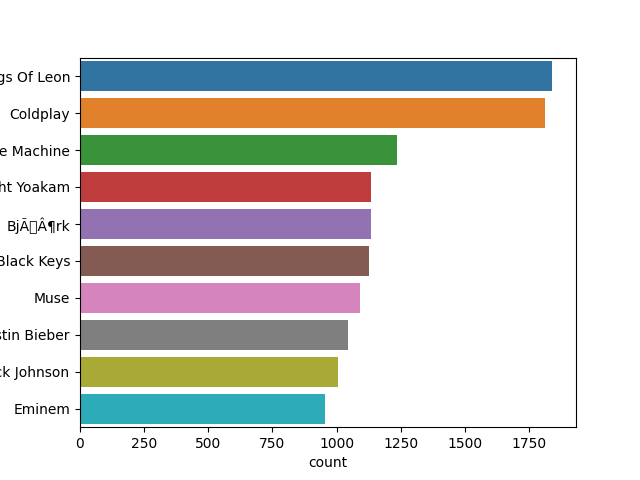

In [40]:
plt.clf()
sns.barplot(x="count", y="artist", data=top10_artists)
%matplot plt

#### - Which are the top-10 songs overall?

In [31]:
top10_songs = df.filter(df.song != 'None').groupBy('song').count().sort('count', ascending=False).toPandas().iloc[:10,:]
top10_songs

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                song  count
0                                     You're The One   1153
1                                               Undo   1026
2                                            Revelry    854
3                                      Sehr kosmisch    728
4  Horn Concerto No. 4 in E flat K495: II. Romanc...    641
5                     Dog Days Are Over (Radio Edit)    574
6                                            Secrets    466
7                                       Use Somebody    459
8                                             Canada    435
9                                            Invalid    424

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

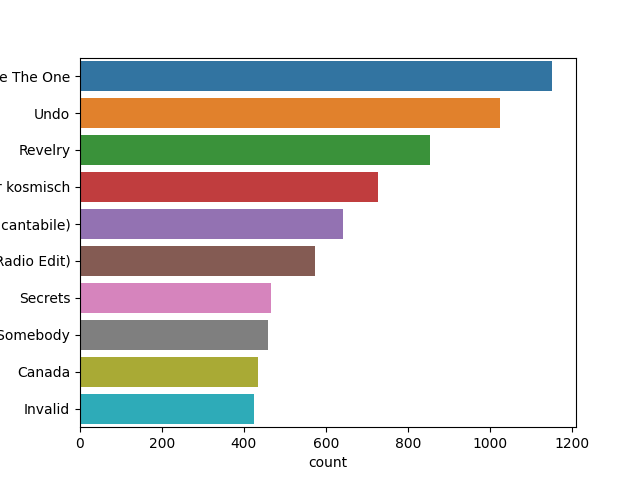

In [39]:
plt.clf()
sns.barplot(x="count", y="song", data=top10_songs);
%matplot plt

#### - How is the distribution of listening time for paid versus free users?

In [33]:
non_null_listening_time = df.filter(df.length.isNotNull()).select(['level','length']).toPandas()
non_null_listening_time.head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  level     length
0  paid  277.89016
1  free  236.09424
2  paid  282.82730
3  free  262.71302
4  paid  223.60771
5  free  208.29995
6  free  260.46649
7  paid  185.44281
8  paid  134.47791
9  free  229.87710

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

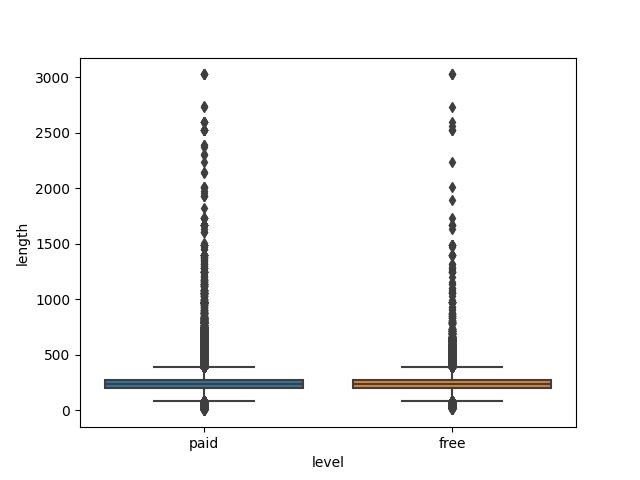

In [38]:
plt.clf()
sns.boxplot(x="level", y="length", data=non_null_listening_time);
%matplot plt

#### - How is the distribution of the average number of songs listened along the hours of the day for paid versus free versus all users?

In [35]:
get_datetime_hour = sf.udf(lambda x: None if x == None else int(x.split(' ')[1][:2]), st.IntegerType())
df = df.withColumn('hour', get_datetime_hour('datetime'))
get_datetime_date = sf.udf(lambda x: None if x == None else x.split(' ')[0])
df = df.withColumn('date', get_datetime_date('datetime'))
songs_per_hour_level = df.filter(df.song != 'None').groupBy(['level','date','hour']).count().groupBy(['level','hour']).agg(sf.avg('count').alias('mean_num_songs')).sort('mean_num_songs', ascending=False).toPandas()
songs_per_hour_level

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   level  hour  mean_num_songs
0   paid    16      149.344262
1   paid    17      148.475410
2   paid    18      147.409836
3   paid    19      147.229508
4   paid    15      145.098361
5   paid    20      144.786885
6   paid    21      140.114754
7   paid    22      134.934426
8   paid    14      134.426230
9   paid    23      130.163934
10  paid    13      125.655738
11  paid    12      123.393443
12  paid    10      122.344262
13  paid     0      120.225806
14  paid    11      119.360656
15  paid     9      118.229508
16  paid     3      115.416667
17  paid     8      115.147541
18  paid     2      113.655738
19  paid     1      111.822581
20  paid     5      111.557377
21  paid     4      110.704918
22  paid     7      110.377049
23  paid     6      109.311475
24  free    17       43.690909
25  free    16       43.551724
26  free    15       42.423729
27  free    18       38.763636
28  free    14       38.233333
29  free    13       36.648148
30  free    20       36.142857
31  free

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

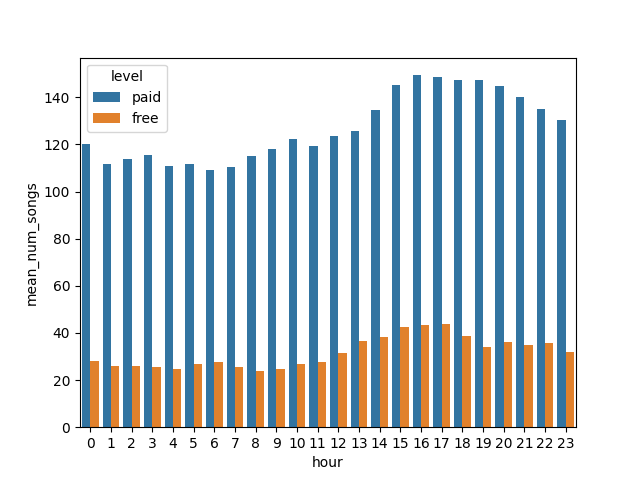

In [41]:
plt.clf()
sns.barplot(x="hour", y="mean_num_songs", hue='level', data=songs_per_hour_level);
%matplot plt

#### - How is the distribution of users per region?

In [43]:
get_region = sf.udf(lambda x: None if x == None else x.split(',')[1])
df = df.withColumn('region', get_region('location'))
users_per_region = df.filter(df.region != 'None').groupBy('region').count().sort('count', ascending=False).toPandas()
users_per_region.head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      region  count
0         CA  46771
1   NY-NJ-PA  23684
2         TX  23494
3      MA-NH  13873
4         FL  13190
5         NC  10688
6      NC-SC   7780
7         CO   7493
8         MI   7216
9         NJ   7001

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

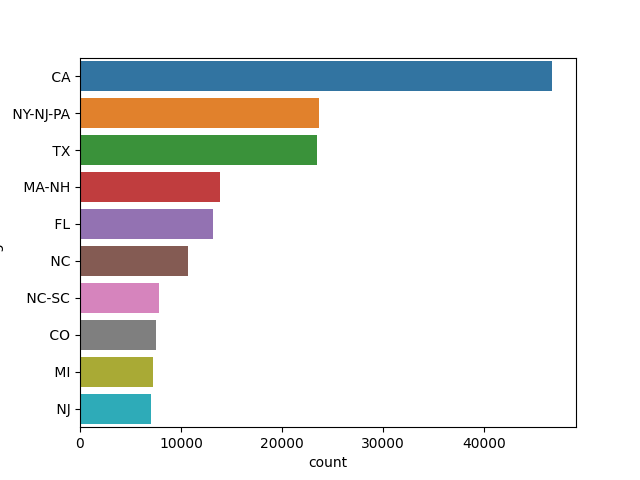

In [44]:
plt.clf()
sns.barplot(x="count", y="region", data=users_per_region.head(10));
%matplot plt

## Define Churn

Once you've done some preliminary analysis, create a column `Churn` to use as the label for your model. I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

### Create Churn column based on the Cancellation Confirmation event

#### Overview of the Cancellation Confirmation event on the dataset

In [45]:
df.filter(df.page == 'Cancellation Confirmation').take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(artist=None, auth='Cancelled', firstName='Adriel', gender='M', itemInSession=104, lastName='Mendoza', length=None, level='paid', location='Kansas City, MO-KS', method='GET', page='Cancellation Confirmation', registration=1535623466000, sessionId=514, song=None, status=200, ts=1538943990000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.77.4 (KHTML, like Gecko) Version/7.0.5 Safari/537.77.4"', userId='18', datetime='2018-10-07 20:26:30', hour=20, date='2018-10-07', region=' MO-KS'), Row(artist=None, auth='Cancelled', firstName='Diego', gender='M', itemInSession=56, lastName='Mckee', length=None, level='paid', location='Phoenix-Mesa-Scottsdale, AZ', method='GET', page='Cancellation Confirmation', registration=1537167593000, sessionId=540, song=None, status=200, ts=1539033046000, userAgent='"Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Version/7.0 Mobile/11D257 Safari/9537.53"', userId='32', datetime='20

In [46]:
df.select(["userId", "datetime", "page", "level", "length"]).filter(df.userId == '125').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(userId='125', datetime='2018-10-12 04:05:44', page='NextSong', level='free', length=337.91955), Row(userId='125', datetime='2018-10-12 04:11:21', page='NextSong', level='free', length=230.03383), Row(userId='125', datetime='2018-10-12 04:15:11', page='NextSong', level='free', length=203.2322), Row(userId='125', datetime='2018-10-12 04:18:34', page='NextSong', level='free', length=210.83383), Row(userId='125', datetime='2018-10-12 04:22:04', page='NextSong', level='free', length=391.26159), Row(userId='125', datetime='2018-10-12 04:28:35', page='NextSong', level='free', length=213.60281), Row(userId='125', datetime='2018-10-12 04:32:08', page='NextSong', level='free', length=178.41587), Row(userId='125', datetime='2018-10-12 04:35:06', page='NextSong', level='free', length=323.81342), Row(userId='125', datetime='2018-10-12 04:35:17', page='Roll Advert', level='free', length=None), Row(userId='125', datetime='2018-10-12 04:35:18', page='Cancel', level='free', length=None), Row(userI

In [47]:
flag_churn_1 = sf.udf(lambda x: 1 if x == "Cancellation Confirmation" else 0, st.IntegerType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
df = df.withColumn("churned1", flag_churn_1("page"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
df.select(["userId", "datetime", "page", "level", "length", "churned1"]).filter(df.userId == '125').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(userId='125', datetime='2018-10-12 04:05:44', page='NextSong', level='free', length=337.91955, churned1=0), Row(userId='125', datetime='2018-10-12 04:11:21', page='NextSong', level='free', length=230.03383, churned1=0), Row(userId='125', datetime='2018-10-12 04:15:11', page='NextSong', level='free', length=203.2322, churned1=0), Row(userId='125', datetime='2018-10-12 04:18:34', page='NextSong', level='free', length=210.83383, churned1=0), Row(userId='125', datetime='2018-10-12 04:22:04', page='NextSong', level='free', length=391.26159, churned1=0), Row(userId='125', datetime='2018-10-12 04:28:35', page='NextSong', level='free', length=213.60281, churned1=0), Row(userId='125', datetime='2018-10-12 04:32:08', page='NextSong', level='free', length=178.41587, churned1=0), Row(userId='125', datetime='2018-10-12 04:35:06', page='NextSong', level='free', length=323.81342, churned1=0), Row(userId='125', datetime='2018-10-12 04:35:17', page='Roll Advert', level='free', length=None, churned

### Create Churn2 column considering the Submit Downgrade event

#### Overview of the Submit Downgrade event on the dataset

In [50]:
df.filter(df.page == 'Submit Downgrade').take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(artist=None, auth='Logged In', firstName='Kael', gender='M', itemInSession=47, lastName='Baker', length=None, level='paid', location='Kingsport-Bristol-Bristol, TN-VA', method='PUT', page='Submit Downgrade', registration=1533102330000, sessionId=249, song=None, status=307, ts=1538393619000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.77.4 (KHTML, like Gecko) Version/7.0.5 Safari/537.77.4"', userId='131', datetime='2018-10-01 11:33:39', hour=11, date='2018-10-01', region=' TN-VA', churned1=0), Row(artist=None, auth='Logged In', firstName='Calvin', gender='M', itemInSession=17, lastName='Marshall', length=None, level='paid', location='Pittsburgh, PA', method='PUT', page='Submit Downgrade', registration=1537120757000, sessionId=313, song=None, status=307, ts=1538516445000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.78.2 (KHTML, like Gecko) Version/7.0.6 Safari/537.78.2"', userId='38', datetime='2018-10-02 21:40:45', hour=

In [51]:
df.select(["userId", "datetime", "page", "level", "length"]).filter(df.userId == '30').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(userId='30', datetime='2018-10-01 00:01:57', page='NextSong', level='paid', length=277.89016), Row(userId='30', datetime='2018-10-01 00:06:34', page='NextSong', level='paid', length=282.8273), Row(userId='30', datetime='2018-10-01 00:11:16', page='NextSong', level='paid', length=223.60771), Row(userId='30', datetime='2018-10-01 00:14:59', page='NextSong', level='paid', length=185.44281), Row(userId='30', datetime='2018-10-01 00:15:05', page='Add to Playlist', level='paid', length=None), Row(userId='30', datetime='2018-10-01 00:18:04', page='NextSong', level='paid', length=134.47791), Row(userId='30', datetime='2018-10-01 00:20:18', page='NextSong', level='paid', length=223.58159), Row(userId='30', datetime='2018-10-01 00:24:01', page='NextSong', level='paid', length=246.69995), Row(userId='30', datetime='2018-10-01 00:28:07', page='NextSong', level='paid', length=222.22322), Row(userId='30', datetime='2018-10-01 00:31:49', page='NextSong', level='paid', length=223.92118), Row(user

In [52]:
home_acc_window = Window.partitionBy("userId").orderBy("ts").rangeBetween(Window.unboundedPreceding, 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
df = df.withColumn('next_level', sf.lead('level').over(
    Window.partitionBy('userId').orderBy('ts')
    )
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [54]:
flag_churn_2 = sf.udf(lambda x, y: 1 if (x == "Submit Downgrade" and y == "free") else 0, st.IntegerType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
df = df.withColumn("churned2", flag_churn_2("page","next_level"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [56]:
df.select(["userId", "datetime", "page", "level", "length", "next_level", "churned2"]).filter(df.userId == '30').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(userId='30', datetime='2018-10-01 00:01:57', page='NextSong', level='paid', length=277.89016, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:06:34', page='NextSong', level='paid', length=282.8273, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:11:16', page='NextSong', level='paid', length=223.60771, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:14:59', page='NextSong', level='paid', length=185.44281, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:15:05', page='Add to Playlist', level='paid', length=None, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:18:04', page='NextSong', level='paid', length=134.47791, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:20:18', page='NextSong', level='paid', length=223.58159, next_level='paid', churned2=0), Row(userId='30', datetime='2018-10-01 00:24:01', page='NextSong', level='paid', length=2

### Create Churn3 column considering both Cancellation Confirmation and Submit Downgrade events

In [57]:
or_between_cols = sf.udf(lambda x, y: 1 if ((x == 1) | (y == 1)) else 0, st.IntegerType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
df = df.withColumn("churned3", or_between_cols("churned1","churned2"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [59]:
df.select(["datetime", "page", "level", "next_level", "churned1", "churned2", "churned3"]).filter(df.userId == '30').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(datetime='2018-10-01 00:01:57', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:06:34', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:11:16', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:14:59', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:15:05', page='Add to Playlist', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:18:04', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:20:18', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(datetime='2018-10-01 00:24:01', page='NextSong', level='paid', next_level='paid', churned1=0, churned2=0, churned3=0), Row(date

### Explore Data
Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

### Churn EDA Questions

#### - How is the distribution of churning/downgrading/cancelling users over the months of the year?

In [60]:
get_datetime_month = sf.udf(lambda x: None if x == None else int(x.split(' ')[0][5:7]), st.IntegerType())
df = df.withColumn('month', get_datetime_month('datetime'))
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist=None, auth='Logged In', firstName='Cason', gender='M', itemInSession=0, lastName='Smith', length=None, level='free', location='Monroe, LA', method='GET', page='Home', registration=1532610926000, sessionId=5, song=None, status=200, ts=1538407015000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='100005', datetime='2018-10-01 15:16:55', hour=15, date='2018-10-01', region=' LA', churned1=0, next_level='free', churned2=0, churned3=0, month=10)

In [61]:
churning_per_month = df.groupBy('month').agg(
                        (sf.sum('churned1')/sf.countDistinct('userId')).alias('cancelled'),
                        (sf.sum('churned2')/sf.countDistinct('userId')).alias('downgraded'),
                        (sf.sum('churned3')/sf.countDistinct('userId')).alias('churned')) \
                        .toPandas() \
                    .melt(id_vars=['month'], 
                          value_vars=['cancelled','downgraded','churned'],
                          var_name='Churn Type',
                          value_name='prop')

churning_per_month

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   month  Churn Type      prop
0     12   cancelled  0.000000
1     11   cancelled  0.117021
2     10   cancelled  0.140187
3     12  downgraded  0.000000
4     11  downgraded  0.132979
5     10  downgraded  0.172897
6     12     churned  0.000000
7     11     churned  0.250000
8     10     churned  0.313084

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

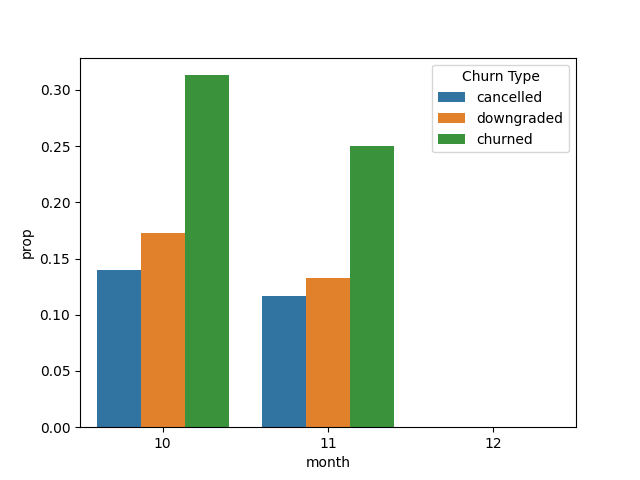

In [63]:
plt.clf()
sns.barplot(x="month", y="prop", hue="Churn Type", data=churning_per_month);
%matplot plt

#### - How is the distribution of churning/downgrading/cancelling users per region?

In [64]:
churning_per_region = df.groupBy('region').agg(
                        (sf.sum('churned1')/sf.countDistinct('userId')).alias('cancelled'),
                        (sf.sum('churned2')/sf.countDistinct('userId')).alias('downgraded'),
                        (sf.sum('churned3')/sf.countDistinct('userId')).alias('churned'),
                        (sf.countDistinct('userId').alias('users'))) \
                        .toPandas() \
                    .melt(id_vars=['region'], 
                          value_vars=['cancelled','downgraded','churned','users'],
                          var_name='Churn Type',
                          value_name='prop') \
                    .sort_values(['prop'], ascending=False)

churning_per_region.head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        region Churn Type  prop
200         CA      users  33.0
231         TX      users  16.0
220   NY-NJ-PA      users  15.0
199         FL      users  14.0
203         CT      users   7.0
181         AZ      users   7.0
204         NC      users   6.0
196   IL-IN-WI      users   6.0
225      NC-SC      users   6.0
183      MO-IL      users   6.0

In [65]:
largest_regions = churning_per_region[churning_per_region['Churn Type'] == 'users'].sort_values('prop', ascending=False)
largest_regions

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

           region Churn Type  prop
200            CA      users  33.0
231            TX      users  16.0
220      NY-NJ-PA      users  15.0
199            FL      users  14.0
203            CT      users   7.0
181            AZ      users   7.0
204            NC      users   6.0
196      IL-IN-WI      users   6.0
225         NC-SC      users   6.0
183         MO-IL      users   6.0
182         MA-NH      users   5.0
208            NY      users   5.0
223   PA-NJ-DE-MD      users   5.0
195            MI      users   5.0
235            GA      users   4.0
228            WA      users   4.0
222            CO      users   4.0
194            AL      users   4.0
193   DC-VA-MD-WV      users   4.0
226            KY      users   3.0
209            OH      users   3.0
205         MN-WI      users   3.0
198            IL      users   3.0
227            IN      users   3.0
187            PA      users   3.0
190            MS      users   3.0
215            NV      users   3.0
186         RI-MA   

In [66]:
filtered_regions = largest_regions[largest_regions['prop'] >=10]
filtered_regions

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        region Churn Type  prop
200         CA      users  33.0
231         TX      users  16.0
220   NY-NJ-PA      users  15.0
199         FL      users  14.0

In [67]:
top_churning_per_region = churning_per_region[(churning_per_region['region'].isin(filtered_regions['region'])) & (churning_per_region['Churn Type'] != 'users')]
top_churning_per_region

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        region  Churn Type      prop
161   NY-NJ-PA     churned  0.666667
141         CA     churned  0.666667
140         FL     churned  0.642857
82          CA  downgraded  0.484848
172         TX     churned  0.437500
81          FL  downgraded  0.428571
43    NY-NJ-PA   cancelled  0.333333
102   NY-NJ-PA  downgraded  0.333333
113         TX  downgraded  0.250000
22          FL   cancelled  0.214286
54          TX   cancelled  0.187500
23          CA   cancelled  0.181818

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

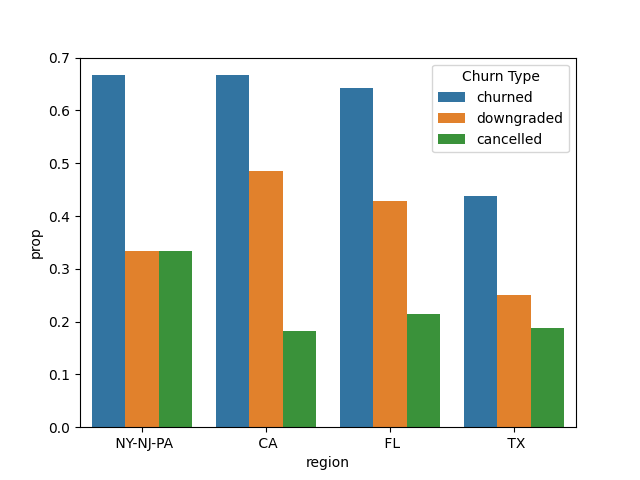

In [68]:
plt.clf()
sns.barplot(x="region", y="prop", hue="Churn Type", data=top_churning_per_region);
%matplot plt

#### - How is the distribution of listening time for:
    

* churning versus non-churning users?

In [69]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- datetime: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- churned1: integer (nullable = true)
 |-- next_level: string (nullable = true)
 |-- churned2: integer (nullable = true)
 |-- churned3: integer (nullabl

In [70]:
df.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(artist=None, auth='Logged In', firstName='Cason', gender='M', itemInSession=0, lastName='Smith', length=None, level='free', location='Monroe, LA', method='GET', page='Home', registration=1532610926000, sessionId=5, song=None, status=200, ts=1538407015000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='100005', datetime='2018-10-01 15:16:55', hour=15, date='2018-10-01', region=' LA', churned1=0, next_level='free', churned2=0, churned3=0, month=10), Row(artist='Michael Jackson', auth='Logged In', firstName='Cason', gender='M', itemInSession=1, lastName='Smith', length=314.53995, level='free', location='Monroe, LA', method='PUT', page='NextSong', registration=1532610926000, sessionId=5, song='Thriller', status=200, ts=1538407016000, userAgent='"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='100005', datet

In [71]:
user_churned = sf.udf(lambda x: 1 if sf.sum(x) > 0 else 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [72]:
churning_users = df.groupby('userId').agg(sf.sum('churned3').alias('churned')).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [73]:
churning_users

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     userId  churned
0         7        0
1    100014        1
2       154        0
3    300017        0
4    200010        0
..      ...      ...
221     151        0
222       2        0
223      50        0
224  200021        1
225     119        0

[226 rows x 2 columns]

In [74]:
listening_time_ch_vs_nch = df.filter(df.length.isNotNull()).select(['level','length']).toPandas()
listening_time_ch_vs_nch.head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  level     length
0  paid  277.89016
1  free  236.09424
2  paid  282.82730
3  free  262.71302
4  paid  223.60771
5  free  208.29995
6  free  260.46649
7  paid  185.44281
8  paid  134.47791
9  free  229.87710

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

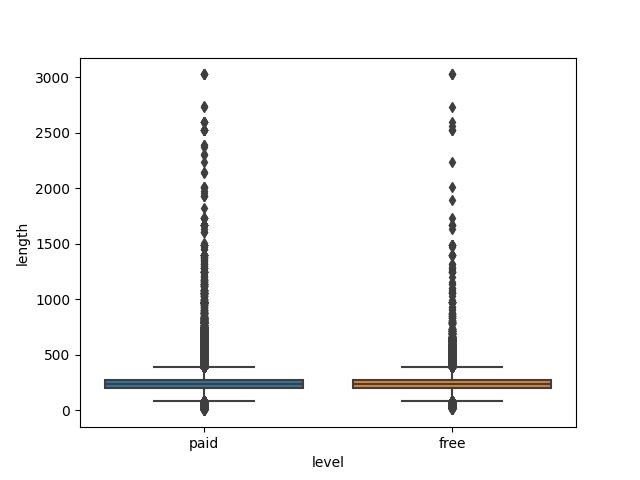

In [75]:
plt.clf()
sns.boxplot(x="level", y="length", data=non_null_listening_time);
%matplot plt

* downgrading versus non-downgrading users?
    

* cancelling versus non-cancelling users?

#### - How is the distribution of listening time for churning users in the 15 days prior to their churning compared to their overall distribution?

#### - How is the distribution of listening time for churning users in the 7 days prior to their churning compared to their overall distribution?

#### - Do churning users access Downgrading/Cancel pages more often than non-churning users overall / in the 15 / 7 days prior to their churning?

# Feature Engineering
Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
- Write a script to extract the necessary features from the smaller subset of data
- Ensure that your script is scalable, using the best practices discussed in Lesson 3
- Try your script on the full data set, debugging your script if necessary

If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.

### Build X dataframe

#### Select id, basic features and reference timestamp

In [76]:
X_base_df = df.groupBy(['userId','date']) \
                .agg(sf.first('month').alias('month'),
                     sf.first('region').alias('region'),
                     sf.first('gender').alias('gender'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [77]:
X_base_df.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(userId='', date='2018-10-06', month=10, region=None, gender=None), Row(userId='', date='2018-10-12', month=10, region=None, gender=None), Row(userId='', date='2018-10-14', month=10, region=None, gender=None), Row(userId='', date='2018-10-20', month=10, region=None, gender=None), Row(userId='', date='2018-10-30', month=10, region=None, gender=None)]

In [78]:
X_base_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- userId: string (nullable = true)
 |-- date: string (nullable = true)
 |-- month: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- gender: string (nullable = true)

#### Add computed feature: Median Listening Time in the previous 1, 3, 7, and 14 days

In [79]:
recent_list_time = df.groupBy(['userId','date']) \
                    .agg(sf.mean('length').alias('mean_list_time')) \
                    .orderBy(['userId','date']) \
                    .fillna(0, subset=['mean_list_time']) \
                    .withColumn('timestamp',
                                sf.unix_timestamp(sf.col('date'), "yyyy-MM-dd")
)
recent_list_time.filter(recent_list_time.userId == '30').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   userId        date  mean_list_time   timestamp
0      30  2018-10-01      269.813969  1538352000
1      30  2018-10-06      164.701590  1538784000
2      30  2018-10-07      232.347435  1538870400
3      30  2018-10-08      259.483355  1538956800
4      30  2018-10-10      396.146486  1539129600
5      30  2018-10-11      251.658676  1539216000
6      30  2018-10-15      259.953366  1539561600
7      30  2018-10-16        0.000000  1539648000
8      30  2018-10-20        0.000000  1539993600
9      30  2018-10-23      259.968068  1540252800
10     30  2018-10-26      242.383655  1540512000
11     30  2018-10-27      277.087983  1540598400
12     30  2018-10-31      252.463141  1540944000
13     30  2018-11-01      252.915385  1541030400
14     30  2018-11-02      260.516795  1541116800
15     30  2018-11-03      260.133693  1541203200
16     30  2018-11-04      252.582343  1541289600
17     30  2018-11-05      235.614778  1541376000
18     30  2018-11-06        0.000000  1541462400


In [80]:
recent_list_time.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- userId: string (nullable = true)
 |-- date: string (nullable = true)
 |-- mean_list_time: double (nullable = false)
 |-- timestamp: long (nullable = true)

In [81]:
millis_in_a_day = 24*60*60
millis_in_a_day

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

86400

In [82]:
w_1day_before = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(-((millis_in_a_day)-1),0)
w_3days_before = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(-((3*millis_in_a_day)-1),0)
w_7days_before = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(-((7*millis_in_a_day)-1),0)
w_14days_before = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(-((14*millis_in_a_day)-1),0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [83]:
recent_list_time = recent_list_time.withColumn('mean_list_time_in_24_hours',sf.mean('mean_list_time').over(w_1day_before)) \
        .withColumn('mean_list_time_in_3_days',sf.mean('mean_list_time').over(w_3days_before)) \
        .withColumn('mean_list_time_in_7_days',sf.mean('mean_list_time').over(w_7days_before)) \
        .withColumn('mean_list_time_in_14_days',sf.mean('mean_list_time').over(w_14days_before))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [84]:
recent_list_time.filter(df.userId == '30').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   userId        date  ...  mean_list_time_in_7_days  mean_list_time_in_14_days
0      30  2018-10-01  ...                269.813969                 269.813969
1      30  2018-10-06  ...                217.257779                 217.257779
2      30  2018-10-07  ...                222.287665                 222.287665
3      30  2018-10-08  ...                218.844127                 231.586587
4      30  2018-10-10  ...                263.169716                 264.498567
5      30  2018-10-11  ...                260.867508                 262.358585
6      30  2018-10-15  ...                302.586176                 260.715151
7      30  2018-10-16  ...                226.939632                 223.470130
8      30  2018-10-20  ...                 86.651122                 199.941331
9      30  2018-10-23  ...                129.984034                 194.621099
10     30  2018-10-26  ...                167.450575                 152.461018
11     30  2018-10-27  ...              

In [85]:
recent_list_time.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- userId: string (nullable = true)
 |-- date: string (nullable = true)
 |-- mean_list_time: double (nullable = false)
 |-- timestamp: long (nullable = true)
 |-- mean_list_time_in_24_hours: double (nullable = true)
 |-- mean_list_time_in_3_days: double (nullable = true)
 |-- mean_list_time_in_7_days: double (nullable = true)
 |-- mean_list_time_in_14_days: double (nullable = true)

#### Add computed feature: Time since last downgrade

#### Add computed feature: Accessed Cancel/Downgrade pages within last month/two weeks/3 days/24 hours/3 hours

#### Number of errors occurred (status code / error page) within last month/two weeks/3 days/24 hours/ 3 hours

#### Assemble final X dataframe

In [86]:
X_df = X_base_df.join(recent_list_time, on=['userId','date'], how='inner') \
                .drop('mean_list_time','timestamp')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [87]:
X_df.filter(X_df.userId == '30').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   userId        date  ...  mean_list_time_in_7_days mean_list_time_in_14_days
0      30  2018-10-08  ...                218.844127                231.586587
1      30  2018-11-06  ...                216.318019                225.966419
2      30  2018-10-07  ...                222.287665                222.287665
3      30  2018-10-16  ...                226.939632                223.470130
4      30  2018-10-06  ...                217.257779                217.257779
5      30  2018-11-20  ...                271.359545                248.428976
6      30  2018-11-09  ...                198.296358                226.051677
7      30  2018-11-10  ...                198.098379                224.057878
8      30  2018-11-02  ...                260.745826                220.762147
9      30  2018-11-11  ...                191.594228                223.658249
10     30  2018-10-01  ...                269.813969                269.813969
11     30  2018-10-20  ...                 86.651122

#### Add Y label - Whether or not the user will churn in the next day

In [88]:
#try sf.isnull
greater_than_0 = sf.udf(lambda x: 0 if (x == None) else 0 if (x > 0) else 1, st.IntegerType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [89]:
will_churn_in_future = df.groupBy(['userId','date']) \
                    .agg(greater_than_0(sf.sum('churned3')).alias('churned_today')) \
                    .orderBy(['userId','date']) \
                    .fillna(0, subset=['churned_today']) \
                    .withColumn('timestamp',
                                sf.unix_timestamp(sf.col('date'), "yyyy-MM-dd")
)
will_churn_in_future.filter(will_churn_in_future.userId == '30').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   userId        date  churned_today   timestamp
0      30  2018-10-01              1  1538352000
1      30  2018-10-06              1  1538784000
2      30  2018-10-07              1  1538870400
3      30  2018-10-08              0  1538956800
4      30  2018-10-10              1  1539129600
5      30  2018-10-11              1  1539216000
6      30  2018-10-15              1  1539561600
7      30  2018-10-16              1  1539648000
8      30  2018-10-20              1  1539993600
9      30  2018-10-23              1  1540252800
10     30  2018-10-26              1  1540512000
11     30  2018-10-27              1  1540598400
12     30  2018-10-31              1  1540944000
13     30  2018-11-01              1  1541030400
14     30  2018-11-02              1  1541116800
15     30  2018-11-03              1  1541203200
16     30  2018-11-04              1  1541289600
17     30  2018-11-05              1  1541376000
18     30  2018-11-06              1  1541462400
19     30  2018-11-0

In [90]:
w_1day_after = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(millis_in_a_day,millis_in_a_day)
w_3days_after = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(millis_in_a_day,3*millis_in_a_day)
w_7days_after = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(millis_in_a_day,7*millis_in_a_day)
w_14days_after = Window.partitionBy(['userId']).orderBy('timestamp').rangeBetween(millis_in_a_day,14*millis_in_a_day)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [91]:
will_churn_in_future = will_churn_in_future.withColumn('will_churn_in_1day',greater_than_0(sf.sum('churned_today').over(w_1day_after))) \
        .withColumn('will_churn_in_3days',greater_than_0(sf.sum('churned_today').over(w_3days_after))) \
        .withColumn('will_churn_in_7days',greater_than_0(sf.sum('churned_today').over(w_7days_after))) \
        .withColumn('will_churn_in_14days',greater_than_0(sf.sum('churned_today').over(w_14days_after))) \
        .fillna(0, subset=['will_churn_in_1day', 'will_churn_in_3days', 'will_churn_in_7days', 'will_churn_in_14days'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [92]:
will_churn_in_future.filter(df.userId == '30').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   userId        date  ...  will_churn_in_7days  will_churn_in_14days
0      30  2018-10-01  ...                    0                     0
1      30  2018-10-06  ...                    0                     0
2      30  2018-10-07  ...                    0                     0
3      30  2018-10-08  ...                    0                     0
4      30  2018-10-10  ...                    0                     0
5      30  2018-10-11  ...                    0                     0
6      30  2018-10-15  ...                    0                     0
7      30  2018-10-16  ...                    0                     0
8      30  2018-10-20  ...                    0                     0
9      30  2018-10-23  ...                    0                     0
10     30  2018-10-26  ...                    0                     0
11     30  2018-10-27  ...                    0                     0
12     30  2018-10-31  ...                    0                     0
13     30  2018-11-0

In [93]:
model_df = X_df.join(will_churn_in_future.drop('timestamp'), on=['userId','date'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [94]:
model_df.filter(df.userId == '30').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   userId        date  ...  will_churn_in_7days will_churn_in_14days
0      30  2018-10-08  ...                    0                    0
1      30  2018-11-06  ...                    0                    0
2      30  2018-10-07  ...                    0                    0
3      30  2018-10-16  ...                    0                    0
4      30  2018-10-06  ...                    0                    0
5      30  2018-11-20  ...                    0                    0
6      30  2018-11-09  ...                    0                    0
7      30  2018-11-10  ...                    0                    0
8      30  2018-11-02  ...                    0                    0
9      30  2018-11-11  ...                    0                    0
10     30  2018-10-01  ...                    0                    0
11     30  2018-10-20  ...                    0                    0
12     30  2018-10-26  ...                    0                    0
13     30  2018-11-05  ...        

In [95]:
model_df.select("will_churn_in_14days").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|will_churn_in_14days|
+--------------------+
|                   1|
|                   0|
+--------------------+

In [96]:
model_df.write.mode('overwrite').option("header", "true").csv("data/model_01_data.csv")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

In [97]:
model_df = spark.read.csv("data/model_01_data.csv", header=True, inferSchema =True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [98]:
model_df.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(userId=100, date=datetime.datetime(2018, 11, 13, 0, 0), month=11, region='TX', gender='M', mean_list_time_in_24_hours=202.48118000000002, mean_list_time_in_3_days=202.48118000000002, mean_list_time_in_7_days=241.4705859770115, mean_list_time_in_14_days=247.95503413895574, churned_today=1, will_churn_in_1day=0, will_churn_in_3days=0, will_churn_in_7days=0, will_churn_in_14days=0), Row(userId=100004, date=datetime.datetime(2018, 10, 5, 0, 0), month=10, region='NY', gender='F', mean_list_time_in_24_hours=141.84444, mean_list_time_in_3_days=187.5064827777778, mean_list_time_in_7_days=187.5064827777778, mean_list_time_in_14_days=187.5064827777778, churned_today=1, will_churn_in_1day=0, will_churn_in_3days=0, will_churn_in_7days=0, will_churn_in_14days=0), Row(userId=100008, date=datetime.datetime(2018, 10, 15, 0, 0), month=10, region='CA', gender='F', mean_list_time_in_24_hours=243.9259773913044, mean_list_time_in_3_days=248.20044651383404, mean_list_time_in_7_days=249.42017522120275, 

In [99]:
model_1_df = model_df.drop('userId','date','region','gender','churned_today','will_churn_in_1day',
                           'will_churn_in_3days','will_churn_in_14days') \
                .withColumnRenamed('will_churn_in_7days','label')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [100]:
columns_to_scale = ['month','mean_list_time_in_24_hours','mean_list_time_in_3_days',
                    'mean_list_time_in_7_days','mean_list_time_in_14_days']

base_assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in columns_to_scale]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in columns_to_scale]
final_assembler = VectorAssembler(inputCols=[col + "_scaled" for col in columns_to_scale], outputCol="features")

#model_1_df = assembler.transform(model_1_df)
#scaler_model = scaler.fit(model_1_df)
#model_1_df = model_1_df.select(['raw_features','label'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [101]:
scalers[0].getInputCol(), scalers[0].getOutputCol()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

('month_vec', 'month_scaled')

In [102]:
model_1_df.groupBy('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|   57|
|    0| 3128|
+-----+-----+

In [103]:
train, test, validation = model_1_df.randomSplit([0.6, 0.25, 0.15], seed=199)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [104]:
#print(train.count(), test.count(), validation.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [105]:
lr = LogisticRegression(maxIter=10, regParam=0.0, elasticNetParam=0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [106]:
pipeline = Pipeline(stages=base_assemblers + scalers + [final_assembler, lr])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [107]:
pipeline.getStages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[VectorAssembler_7af589061d97, VectorAssembler_8f34306100ec, VectorAssembler_05d80331eeba, VectorAssembler_48049178fae5, VectorAssembler_1e75046b1996, MinMaxScaler_f39727fd7f78, MinMaxScaler_651fa124b084, MinMaxScaler_a1f261946a61, MinMaxScaler_e89f385d3ff4, MinMaxScaler_fa5e03163ef0, VectorAssembler_535a7d6adc73, LogisticRegression_0a7f16b74adb]

In [108]:
final_assembler.getInputCols(), final_assembler.getOutputCol()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(['month_scaled', 'mean_list_time_in_24_hours_scaled', 'mean_list_time_in_3_days_scaled', 'mean_list_time_in_7_days_scaled', 'mean_list_time_in_14_days_scaled'], 'features')

In [109]:
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam,[0.1, 0.5, 1]) \
    .build()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [110]:
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [111]:
cvModel = crossval.fit(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [112]:
cvModel.avgMetrics

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.5902933762600066, 0.5458089426849835, 0.5434433129867822]

In [113]:
test_preds = cvModel.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [114]:
test_preds.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     month  ...  prediction
0       10  ...         0.0
1       10  ...         0.0
2       10  ...         0.0
3       10  ...         0.0
4       10  ...         0.0
..     ...  ...         ...
806     11  ...         0.0
807     11  ...         0.0
808     11  ...         0.0
809     11  ...         0.0
810     12  ...         0.0

[811 rows x 20 columns]

In [115]:
test_preds.groupby('label', 'prediction').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|  798|
|    1|       0.0|   13|
+-----+----------+-----+

In [116]:
test_preds.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[0.0,0.3338369982...|    0|[4.05651492270764...|       0.0|[0.98298527379476...|
|[0.0,0.3343361246...|    0|[4.06574563308288...|       0.0|[0.98313897317658...|
|[0.0,0.3407246810...|    0|[4.0549262123224,...|       0.0|[0.98295868185661...|
|[0.0,0.3425845567...|    0|[4.05470474653700...|       0.0|[0.98295497170599...|
|[0.0,0.3467815179...|    0|[4.05112037494393...|       0.0|[0.98289481329374...|
|[0.0,0.3491452215...|    0|[4.04963513243326...|       0.0|[0.98286982458885...|
|[0.0,0.3555598983...|    1|[4.03779457755664...|       0.0|[0.98266932432666...|
|[0.0,0.3607624086...|    0|[4.03408084664928...|       0.0|[0.98260596478905...|
|[0.0,0.3617832663...|    0|[4.06294920843135...|       0.0|[0.98309255490921...|
|[0.0,0.36860347

In [117]:
predictionAndLabels = test_preds.select("label", "rawPrediction","prediction")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [118]:
predictionAndLabels.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(label=0, rawPrediction=DenseVector([4.0565, -4.0565]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([4.0657, -4.0657]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([4.0549, -4.0549]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([4.0547, -4.0547]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([4.0511, -4.0511]), prediction=0.0)]

In [119]:
evaluatorMulti = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [120]:
acc = evaluatorMulti.evaluate(predictionAndLabels, {evaluatorMulti.metricName: "accuracy"})
weightedPrecision = evaluatorMulti.evaluate(predictionAndLabels, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(predictionAndLabels, {evaluatorMulti.metricName: "weightedRecall"})
f1 = evaluatorMulti.evaluate(predictionAndLabels, {evaluatorMulti.metricName: "f1"})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [121]:
auc = crossval.getEvaluator().evaluate(predictionAndLabels)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [122]:
print('acc: ', acc)
print('weightedPrecision: ', weightedPrecision)
print('weightedRecall: ', weightedRecall)
print('f1: ', f1)
print('auc: ', auc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

acc:  0.9839704069050554
weightedPrecision:  0.9681977616649003
weightedRecall:  0.9839704069050554
f1:  0.9760203663272023
auc:  0.5763447079236548

## Dealing with Class Imbalance Problem

### Undersampling

#### Prepare Dataset 

In [123]:
model_1_df.toPandas().head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   month  mean_list_time_in_24_hours  ...  mean_list_time_in_14_days  label
0     11                  202.481180  ...                 247.955034      0
1     10                  141.844440  ...                 187.506483      0
2     10                  243.925977  ...                 249.420175      0
3     10                  252.863594  ...                 253.482012      1
4     10                  236.298135  ...                 240.579026      0

[5 rows x 6 columns]

In [124]:
churning_user_days = model_1_df.filter(model_1_df.label == 1)
print(churning_user_days.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

57

In [125]:
churning_user_days.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(month=10, mean_list_time_in_24_hours=252.86359361445795, mean_list_time_in_3_days=255.83860116206768, mean_list_time_in_7_days=266.65490426246845, mean_list_time_in_14_days=253.48201229549653, label=1), Row(month=11, mean_list_time_in_24_hours=234.84619592233017, mean_list_time_in_3_days=234.84619592233017, mean_list_time_in_7_days=234.84619592233017, mean_list_time_in_14_days=250.295329865927, label=1), Row(month=10, mean_list_time_in_24_hours=245.45235291291283, mean_list_time_in_3_days=255.61830447816047, mean_list_time_in_7_days=251.4822447984251, mean_list_time_in_14_days=248.82621723247868, label=1), Row(month=11, mean_list_time_in_24_hours=281.98975020833336, mean_list_time_in_3_days=281.98975020833336, mean_list_time_in_7_days=261.50605283651754, mean_list_time_in_14_days=196.12953962738814, label=1), Row(month=10, mean_list_time_in_24_hours=227.22380285714289, mean_list_time_in_3_days=251.96901833333334, mean_list_time_in_7_days=167.97934555555557, mean_list_time_in_14_da

In [126]:
nonchurning_user_days = model_1_df.filter(model_1_df.label == 0)
print(nonchurning_user_days.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

3128

In [127]:
nonchurning_user_days.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(month=11, mean_list_time_in_24_hours=202.48118000000002, mean_list_time_in_3_days=202.48118000000002, mean_list_time_in_7_days=241.4705859770115, mean_list_time_in_14_days=247.95503413895574, label=0), Row(month=10, mean_list_time_in_24_hours=141.84444, mean_list_time_in_3_days=187.5064827777778, mean_list_time_in_7_days=187.5064827777778, mean_list_time_in_14_days=187.5064827777778, label=0), Row(month=10, mean_list_time_in_24_hours=243.9259773913044, mean_list_time_in_3_days=248.20044651383404, mean_list_time_in_7_days=249.42017522120275, mean_list_time_in_14_days=249.42017522120275, label=0), Row(month=10, mean_list_time_in_24_hours=236.29813451327428, mean_list_time_in_3_days=236.29813451327428, mean_list_time_in_7_days=236.29813451327428, mean_list_time_in_14_days=240.5790263121927, label=0), Row(month=11, mean_list_time_in_24_hours=254.46596804878044, mean_list_time_in_3_days=243.14132777439022, mean_list_time_in_7_days=238.3633528032949, mean_list_time_in_14_days=240.815493

In [128]:
undersampling_ratio = churning_user_days.count()/nonchurning_user_days.count()
undersampled_nonchurning_user_days = nonchurning_user_days.sample(withReplacement=False, fraction=undersampling_ratio, seed=199)
undersampled_nonchurning_user_days.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

65

In [129]:
undersampled_model_1_df = churning_user_days.union(undersampled_nonchurning_user_days)
undersampled_model_1_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

122

In [130]:
undersampled_model_1_df.sample(0.05).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------------+------------------------+------------------------+-------------------------+-----+
|month|mean_list_time_in_24_hours|mean_list_time_in_3_days|mean_list_time_in_7_days|mean_list_time_in_14_days|label|
+-----+--------------------------+------------------------+------------------------+-------------------------+-----+
|   11|         259.0631019496855|       259.0631019496855|       259.0631019496855|        259.0631019496855|    1|
|   10|         251.7264948888889|       251.7264948888889|      259.09205353140095|        254.4711877597481|    1|
|   11|         239.3904190909091|       239.3904190909091|      243.04344204768853|       246.49115147966032|    0|
+-----+--------------------------+------------------------+------------------------+-------------------------+-----+

#### Train Model 

In [131]:
undersampled_model_1_df.groupBy('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|   57|
|    0|   65|
+-----+-----+

In [132]:
undersampled_model_1_df.select("label").distinct().toPandas()['label'].values

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([1, 0], dtype=int32)

In [133]:
sampling_var_values = undersampled_model_1_df.select("label").distinct().toPandas()['label'].values.tolist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [134]:
{val : 0.2/(1-0.6) for val in sampling_var_values}

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{1: 0.5, 0: 0.5}

In [135]:
def generate_stratified_train_test_val_dfs(base_df, sampling_var, train_frac, test_frac, seed):
    # Taking (train_frac)% of both 0's and 1's into training set
    sampling_var_values = undersampled_model_1_df.select(sampling_var) \
                            .distinct().toPandas()[sampling_var].values.tolist()
    train_fracs = {val : train_frac for val in sampling_var_values}
    print('train_fracs', train_fracs)
    s_train = base_df.sampleBy(sampling_var, fractions=train_fracs, seed=seed)

    # Subtracting 'train' from 'base_df' to get test and validation sets
    # Taking (test_frac/(1-train_frac))% of both 0's and 1's into test set
    corrected_test_frac = test_frac/(1-train_frac)
    test_fracs = {val : corrected_test_frac for val in sampling_var_values}
    print('test_fracs', test_fracs)
    s_test = undersampled_model_1_df.subtract(s_train) \
            .sampleBy(sampling_var, fractions=test_fracs, seed=seed)

    # Subtracting 'train' and 'test' from 'base_df' to get validation set
    s_validation = undersampled_model_1_df.subtract(s_train).subtract(s_test)
    
    return(s_train, s_test, s_validation)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [136]:
u_train, u_test, u_validation = generate_stratified_train_test_val_dfs(
    base_df = undersampled_model_1_df, sampling_var = 'label', 
    train_frac = 0.6, test_frac = 0.2, seed=199)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

train_fracs {1: 0.6, 0: 0.6}
test_fracs {1: 0.5, 0: 0.5}

In [137]:
u_train.groupBy('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|   39|
|    0|   30|
+-----+-----+

In [138]:
u_test.groupBy('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|    7|
|    0|   15|
+-----+-----+

In [139]:
u_validation.groupBy('label').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-----+
|label|count|
+-----+-----+
|    1|   12|
|    0|   19|
+-----+-----+

#### Evaluate Model 

In [140]:
cvModel = crossval.fit(u_train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [141]:
cvModel.avgMetrics

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.46504629629629624, 0.46248346560846554, 0.4530009920634921]

In [142]:
u_test_preds = cvModel.transform(u_test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [143]:
u_test_preds.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    month  ...  prediction
0      11  ...         1.0
1      11  ...         1.0
2      11  ...         1.0
3      10  ...         1.0
4      10  ...         1.0
5      11  ...         1.0
6      10  ...         1.0
7      11  ...         1.0
8      11  ...         1.0
9      11  ...         1.0
10     10  ...         1.0
11     10  ...         1.0
12     11  ...         1.0
13     11  ...         0.0
14     11  ...         0.0
15     10  ...         1.0
16     11  ...         1.0
17     10  ...         1.0
18     10  ...         1.0
19     10  ...         1.0
20     11  ...         0.0
21     11  ...         0.0

[22 rows x 20 columns]

In [144]:
u_test_preds.groupby('label', 'prediction').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       1.0|    6|
|    0|       0.0|    4|
|    0|       1.0|   12|
+-----+----------+-----+

In [145]:
u_test_preds.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[1.0,0.7288541091...|    0|[-0.1062081433241...|       1.0|[0.47347289533574...|
|[1.0,0.6633077206...|    0|[-0.0362228033967...|       1.0|[0.49094528917990...|
|[1.0,0.6666259654...|    1|[-0.1012919248645...|       1.0|[0.47469864785557...|
|[0.0,0.6899282207...|    1|[-0.3579895921078...|       1.0|[0.41144631596875...|
|[0.0,0.5233205809...|    0|[-0.2513950065086...|       1.0|[0.43748017030163...|
|[0.0,-1.613430925...|    0|[-0.0948086524059...|       1.0|[0.47631557521869...|
|[1.0,1.0123116275...|    0|[-0.1733278320592...|       1.0|[0.45677620055832...|
|[0.0,0.6751567084...|    0|[-0.4932896941997...|       1.0|[0.37911890654951...|
|[1.0,0.6837983849...|    0|[-0.0546703077505...|       1.0|[0.48633582623150...|
|[1.0,0.65565179

In [146]:
u_predictionAndLabels = u_test_preds.select("label", "rawPrediction","prediction")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [147]:
u_predictionAndLabels.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(label=0, rawPrediction=DenseVector([-0.1062, 0.1062]), prediction=1.0), Row(label=1, rawPrediction=DenseVector([-0.3671, 0.3671]), prediction=1.0), Row(label=1, rawPrediction=DenseVector([-0.358, 0.358]), prediction=1.0), Row(label=1, rawPrediction=DenseVector([-0.1013, 0.1013]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.2514, 0.2514]), prediction=1.0)]

In [148]:
acc = evaluatorMulti.evaluate(u_predictionAndLabels, {evaluatorMulti.metricName: "accuracy"})
weightedPrecision = evaluatorMulti.evaluate(u_predictionAndLabels, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(u_predictionAndLabels, {evaluatorMulti.metricName: "weightedRecall"})
f1 = evaluatorMulti.evaluate(u_predictionAndLabels, {evaluatorMulti.metricName: "f1"})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [149]:
auc = crossval.getEvaluator().evaluate(u_predictionAndLabels)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [150]:
print('acc: ', acc)
print('weightedPrecision: ', weightedPrecision)
print('weightedRecall: ', weightedRecall)
print('f1: ', f1)
print('auc: ', auc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

acc:  0.42857142857142855
weightedPrecision:  0.8057142857142857
weightedRecall:  0.42857142857142855
f1:  0.3125
auc:  0.725

In [151]:
u_y_true = u_predictionAndLabels.select(['label']).toPandas().label.values
u_y_pred = u_predictionAndLabels.select(['prediction']).toPandas().prediction.values

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [152]:
u_y_true

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int32)

In [153]:
print(classification_report(u_y_true, u_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.31      0.83      0.45         6

    accuracy                           0.45        22
   macro avg       0.57      0.57      0.45        22
weighted avg       0.69      0.45      0.45        22

In [154]:
print(confusion_matrix(u_y_true, u_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[ 5 11]
 [ 1  5]]

#### Check Model Generalization 

##### - Original Train 

In [155]:
train_preds = cvModel.transform(train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [156]:
train_preds.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

      month  ...  prediction
0        10  ...         0.0
1        10  ...         0.0
2        10  ...         0.0
3        10  ...         0.0
4        10  ...         0.0
...     ...  ...         ...
1884     11  ...         1.0
1885     11  ...         1.0
1886     11  ...         1.0
1887     11  ...         1.0
1888     11  ...         1.0

[1889 rows x 20 columns]

In [157]:
train_preds.groupby('label', 'prediction').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       1.0|   30|
|    0|       0.0|  266|
|    0|       1.0| 1592|
|    1|       0.0|    1|
+-----+----------+-----+

In [158]:
train_preds.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

VBox()

Exception in thread cell_monitor-138:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 1537



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[0.0,-1.613430925...|    0|[0.93447884468018...|       0.0|[0.71798306187924...|
|[0.0,-1.613430925...|    0|[1.06384503397839...|       0.0|[0.74342465035445...|
|[0.0,-1.613430925...|    0|[1.31855535671826...|       0.0|[0.78894125511647...|
|[0.0,-1.613430925...|    0|[1.49358044730847...|       0.0|[0.81661507005268...|
|[0.0,-0.299555036...|    0|[0.09881237897562...|       0.0|[0.52468301449923...|
|[0.0,0.2139793819...|    0|[-0.2844746892121...|       1.0|[0.42935708950158...|
|[0.0,0.2657098696...|    0|[-0.0317387459650...|       1.0|[0.49206597952419...|
|[0.0,0.3551646764...|    0|[-0.2991282430168...|       1.0|[0.42577060524587...|
|[0.0,0.3607968042...|    0|[-0.0487582290283...|       1.0|[0.48781285708772...|
|[0.0,0.44985565

In [159]:
train_predictionAndLabels = train_preds.select("label", "rawPrediction","prediction")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [160]:
train_predictionAndLabels.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(label=0, rawPrediction=DenseVector([0.9345, -0.9345]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([1.0638, -1.0638]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([1.3186, -1.3186]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([1.4936, -1.4936]), prediction=0.0), Row(label=0, rawPrediction=DenseVector([0.0988, -0.0988]), prediction=0.0)]

In [161]:
acc = evaluatorMulti.evaluate(train_predictionAndLabels, {evaluatorMulti.metricName: "accuracy"})
weightedPrecision = evaluatorMulti.evaluate(train_predictionAndLabels, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(train_predictionAndLabels, {evaluatorMulti.metricName: "weightedRecall"})
f1 = evaluatorMulti.evaluate(train_predictionAndLabels, {evaluatorMulti.metricName: "f1"})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [162]:
auc = crossval.getEvaluator().evaluate(train_predictionAndLabels)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [163]:
print('acc: ', acc)
print('weightedPrecision: ', weightedPrecision)
print('weightedRecall: ', weightedRecall)
print('f1: ', f1)
print('auc: ', auc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

acc:  0.15669666490206458
weightedPrecision:  0.9802088749160522
weightedRecall:  0.1566966649020646
f1:  0.246840122586626
auc:  0.6037188791277475

In [164]:
train_y_true = train_predictionAndLabels.select(['label']).toPandas().label.values
train_y_pred = train_predictionAndLabels.select(['prediction']).toPandas().prediction.values

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [165]:
train_y_true

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [166]:
print(classification_report(train_y_true, train_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              precision    recall  f1-score   support

           0       1.00      0.14      0.25      1858
           1       0.02      0.97      0.04        31

    accuracy                           0.16      1889
   macro avg       0.51      0.56      0.14      1889
weighted avg       0.98      0.16      0.25      1889

In [167]:
print(confusion_matrix(train_y_true, train_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[ 266 1592]
 [   1   30]]

#####  - Original Test 

In [168]:
test_preds = cvModel.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [169]:
test_preds.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     month  ...  prediction
0       10  ...         1.0
1       10  ...         1.0
2       10  ...         1.0
3       10  ...         1.0
4       10  ...         1.0
..     ...  ...         ...
806     11  ...         1.0
807     11  ...         1.0
808     11  ...         1.0
809     11  ...         1.0
810     12  ...         0.0

[811 rows x 20 columns]

In [170]:
test_preds.groupby('label', 'prediction').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       1.0|   13|
|    0|       0.0|  118|
|    0|       1.0|  680|
+-----+----------+-----+

In [171]:
test_preds.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[0.0,0.3627083207...|    0|[-0.0989596665565...|       1.0|[0.47528025347428...|
|[0.0,0.3656628865...|    0|[-0.1003177042011...|       1.0|[0.47494158533483...|
|[0.0,0.4034797764...|    0|[-0.3041428439981...|       1.0|[0.42454504422695...|
|[0.0,0.4144892611...|    0|[-0.1284455240540...|       1.0|[0.46793269474368...|
|[0.0,0.4393330612...|    0|[-0.3078640391817...|       1.0|[0.42363618811084...|
|[0.0,0.4533249419...|    0|[-0.3093162497540...|       1.0|[0.42328164331468...|
|(5,[1,2],[0.49129...|    1|[-0.8346679581756...|       1.0|[0.30265896060177...|
|[0.0,0.5220925724...|    0|[-0.1298448442156...|       1.0|[0.46758431933040...|
|[0.0,0.5281355128...|    0|[-0.3620262531208...|       1.0|[0.41046915584570...|
|[0.0,0.56850753

In [172]:
test_predictionAndLabels = test_preds.select("label", "rawPrediction","prediction")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [173]:
test_predictionAndLabels.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(label=0, rawPrediction=DenseVector([-0.099, 0.099]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.1003, 0.1003]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.3041, 0.3041]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.1284, 0.1284]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.3079, 0.3079]), prediction=1.0)]

In [174]:
acc = evaluatorMulti.evaluate(test_predictionAndLabels, {evaluatorMulti.metricName: "accuracy"})
weightedPrecision = evaluatorMulti.evaluate(test_predictionAndLabels, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(test_predictionAndLabels, {evaluatorMulti.metricName: "weightedRecall"})
f1 = evaluatorMulti.evaluate(test_predictionAndLabels, {evaluatorMulti.metricName: "f1"})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [175]:
auc = crossval.getEvaluator().evaluate(test_predictionAndLabels)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [176]:
print('acc: ', acc)
print('weightedPrecision: ', weightedPrecision)
print('weightedRecall: ', weightedRecall)
print('f1: ', f1)
print('auc: ', auc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

acc:  0.16152897657213316
weightedPrecision:  0.9842711063426229
weightedRecall:  0.16152897657213316
f1:  0.25410235119135094
auc:  0.622035858877964

In [177]:
test_y_true = test_predictionAndLabels.select(['label']).toPandas().label.values
test_y_pred = test_predictionAndLabels.select(['prediction']).toPandas().prediction.values

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [178]:
test_y_true

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [179]:
print(classification_report(test_y_true, test_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              precision    recall  f1-score   support

           0       1.00      0.15      0.26       798
           1       0.02      1.00      0.04        13

    accuracy                           0.16       811
   macro avg       0.51      0.57      0.15       811
weighted avg       0.98      0.16      0.25       811

In [180]:
print(confusion_matrix(test_y_true, test_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[118 680]
 [  0  13]]

### Class Weights

#### Define class weights 

In [184]:
# def balanceDataset(dataset: DataFrame, label: String = "label"): DataFrame = {
#   // Re-balancing (weighting) of records to be used in the logistic loss objective function
#   val (datasetSize, positives) = dataset.select(count("*"), sum(dataset(label))).as[(Long, Double)].collect.head
#   val balancingRatio = positives / datasetSize

#   val weightedDataset = {
#     dataset.withColumn("classWeightCol", when(dataset(label) === 0.0, balancingRatio).otherwise(1.0 - balancingRatio))
#   }
#   weightedDataset
# }
    
# df=df.withColumn('new_column', 
# F.when(F.col('fruit1')==F.col('fruit2'), 1)
# .otherwise(F.when((F.col('fruit1').isNull()) | (F.col('fruit2').isNull()), 3))
# .otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [185]:
balancing_ratio = train.select(sf.sum('label')).collect()[0][0]/train.count()
balancing_ratio

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.01641079936474325

In [186]:
w_train = train.withColumn('class_weight', sf.when(sf.col('label') == 0, balancing_ratio) \
                            .otherwise(1-balancing_ratio))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [187]:
w_train.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(month=10, mean_list_time_in_24_hours=0.0, mean_list_time_in_3_days=0.0, mean_list_time_in_7_days=123.614736, mean_list_time_in_14_days=143.884504, label=0, class_weight=0.01641079936474325), Row(month=10, mean_list_time_in_24_hours=0.0, mean_list_time_in_3_days=121.06022059523809, mean_list_time_in_7_days=163.0772753968254, mean_list_time_in_14_days=163.0772753968254, label=0, class_weight=0.01641079936474325), Row(month=10, mean_list_time_in_24_hours=0.0, mean_list_time_in_3_days=128.29880657894736, mean_list_time_in_7_days=179.44757070614037, mean_list_time_in_14_days=194.1210757553885, label=0, class_weight=0.01641079936474325), Row(month=10, mean_list_time_in_24_hours=0.0, mean_list_time_in_3_days=165.62919866341463, mean_list_time_in_7_days=208.9102995495182, mean_list_time_in_14_days=219.24467006610206, label=0, class_weight=0.01641079936474325), Row(month=10, mean_list_time_in_24_hours=141.84444, mean_list_time_in_3_days=187.5064827777778, mean_list_time_in_7_days=187.50648

In [188]:
w_train.filter(sf.col('label') == 1).take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(month=10, mean_list_time_in_24_hours=252.86359361445795, mean_list_time_in_3_days=255.83860116206768, mean_list_time_in_7_days=266.65490426246845, mean_list_time_in_14_days=253.48201229549653, label=1, class_weight=0.9835892006352568), Row(month=11, mean_list_time_in_24_hours=281.98975020833336, mean_list_time_in_3_days=281.98975020833336, mean_list_time_in_7_days=261.50605283651754, mean_list_time_in_14_days=196.12953962738814, label=1, class_weight=0.9835892006352568), Row(month=10, mean_list_time_in_24_hours=229.65929337837844, mean_list_time_in_3_days=248.75566412877166, mean_list_time_in_7_days=247.4943028606055, mean_list_time_in_14_days=245.91815758791952, label=1, class_weight=0.9835892006352568), Row(month=10, mean_list_time_in_24_hours=235.53261000000003, mean_list_time_in_3_days=235.53261000000003, mean_list_time_in_7_days=235.53261000000003, mean_list_time_in_14_days=235.53261000000003, label=1, class_weight=0.9835892006352568), Row(month=10, mean_list_time_in_24_hours

#### Redefine model and pipeline using weight column 

In [189]:
w_lr = LogisticRegression(regParam=0.1, elasticNetParam=0).setWeightCol("class_weight")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [190]:
w_pipeline = Pipeline(stages=base_assemblers + scalers + [final_assembler, w_lr])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [191]:
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam,[0.1, 0.5, 1]) \
    .build()


w_crossval = CrossValidator(estimator=w_pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Train weighted model

In [195]:
w_cvModel = w_crossval.fit(w_train)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-191:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/conda/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3593



In [196]:
w_cvModel.avgMetrics

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[0.5796994129035977, 0.5796994129035977, 0.5796994129035977]

In [197]:
w_test_preds = cvModel.transform(test)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [198]:
w_test_preds.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     month  ...  prediction
0       10  ...         1.0
1       10  ...         1.0
2       10  ...         1.0
3       10  ...         1.0
4       10  ...         1.0
..     ...  ...         ...
806     11  ...         1.0
807     11  ...         1.0
808     11  ...         1.0
809     11  ...         1.0
810     12  ...         0.0

[811 rows x 20 columns]

In [199]:
w_test_preds.groupby('label', 'prediction').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       1.0|   13|
|    0|       0.0|  118|
|    0|       1.0|  680|
+-----+----------+-----+

In [200]:
w_test_preds.select('features', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+----------+--------------------+
|            features|label|       rawPrediction|prediction|         probability|
+--------------------+-----+--------------------+----------+--------------------+
|[0.0,0.3627083207...|    0|[-0.0989596665565...|       1.0|[0.47528025347428...|
|[0.0,0.3656628865...|    0|[-0.1003177042011...|       1.0|[0.47494158533483...|
|[0.0,0.4034797764...|    0|[-0.3041428439981...|       1.0|[0.42454504422695...|
|[0.0,0.4144892611...|    0|[-0.1284455240540...|       1.0|[0.46793269474368...|
|[0.0,0.4393330612...|    0|[-0.3078640391817...|       1.0|[0.42363618811084...|
|[0.0,0.4533249419...|    0|[-0.3093162497540...|       1.0|[0.42328164331468...|
|(5,[1,2],[0.49129...|    1|[-0.8346679581756...|       1.0|[0.30265896060177...|
|[0.0,0.5220925724...|    0|[-0.1298448442156...|       1.0|[0.46758431933040...|
|[0.0,0.5281355128...|    0|[-0.3620262531208...|       1.0|[0.41046915584570...|
|[0.0,0.56850753

In [201]:
w_predictionAndLabels = w_test_preds.select("label", "rawPrediction","prediction")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [202]:
w_predictionAndLabels.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(label=0, rawPrediction=DenseVector([-0.099, 0.099]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.1003, 0.1003]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.3041, 0.3041]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.1284, 0.1284]), prediction=1.0), Row(label=0, rawPrediction=DenseVector([-0.3079, 0.3079]), prediction=1.0)]

In [203]:
acc = evaluatorMulti.evaluate(w_predictionAndLabels, {evaluatorMulti.metricName: "accuracy"})
weightedPrecision = evaluatorMulti.evaluate(w_predictionAndLabels, {evaluatorMulti.metricName: "weightedPrecision"})
weightedRecall = evaluatorMulti.evaluate(w_predictionAndLabels, {evaluatorMulti.metricName: "weightedRecall"})
f1 = evaluatorMulti.evaluate(w_predictionAndLabels, {evaluatorMulti.metricName: "f1"})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [204]:
auc = crossval.getEvaluator().evaluate(w_predictionAndLabels)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [205]:
print('acc: ', acc)
print('weightedPrecision: ', weightedPrecision)
print('weightedRecall: ', weightedRecall)
print('f1: ', f1)
print('auc: ', auc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

acc:  0.16152897657213316
weightedPrecision:  0.9842711063426229
weightedRecall:  0.16152897657213316
f1:  0.25410235119135094
auc:  0.622035858877964

In [206]:
w_y_true = w_predictionAndLabels.select(['label']).toPandas().label.values
w_y_pred = w_predictionAndLabels.select(['prediction']).toPandas().prediction.values

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [207]:
w_y_true

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [208]:
print(classification_report(w_y_true, w_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

              precision    recall  f1-score   support

           0       1.00      0.15      0.26       798
           1       0.02      1.00      0.04        13

    accuracy                           0.16       811
   macro avg       0.51      0.57      0.15       811
weighted avg       0.98      0.16      0.25       811

In [209]:
print(confusion_matrix(w_y_true, w_y_pred))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[[118 680]
 [  0  13]]

In [210]:
# # Print the coefficients and intercept for multinomial logistic regression
# print("Coefficients: \n" + str(cvModel.bestModel.getParam('estimator').confusion_matrix))
# print("Intercept: " + str(lr_model.intercept))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [211]:
#trainingSummary = lr_model.summary

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [212]:
# accuracy = trainingSummary.accuracy
# falsePositiveRate = trainingSummary.weightedFalsePositiveRate
# truePositiveRate = trainingSummary.weightedTruePositiveRate
# fMeasure = trainingSummary.weightedFMeasure()
# precision = trainingSummary.weightedPrecision
# recall = trainingSummary.weightedRecall
# print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
#       % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [213]:
# evaluator = BinaryClassificationEvaluator()
# print('Test Area Under ROC', evaluator.evaluate(test_preds))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.